In [76]:
from IPython.display import IFrame
IFrame("homework1.pdf", width=600, height=300)

In [417]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


In [78]:
#utility function for parsing JSONdata
def parseData(fname):
    for l in fname:
        yield eval(l)

In [79]:
file = open('beer_50000.json')

In [80]:
# loading and parsing JSONdata
data  =list(parseData(file))

In [81]:
data[1]

{'beer/ABV': 6.2,
 'beer/beerId': '48213',
 'beer/brewerId': '10325',
 'beer/name': 'Red Moon',
 'beer/style': 'English Strong Ale',
 'review/appearance': 3.0,
 'review/aroma': 2.5,
 'review/overall': 3.0,
 'review/palate': 3.0,
 'review/taste': 3.0,
 'review/text': 'Dark red color, light beige foam, average.\tIn the smell malt and caramel, not really light.\tAgain malt and caramel in the taste, not bad in the end.\tMaybe a note of honey in teh back, and a light fruitiness.\tAverage body.\tIn the aftertaste a light bitterness, with the malt and red fruit.\tNothing exceptional, but not bad, drinkable beer.',
 'review/timeStruct': {'hour': 13,
  'isdst': 0,
  'mday': 1,
  'min': 44,
  'mon': 3,
  'sec': 57,
  'wday': 6,
  'yday': 60,
  'year': 2009},
 'review/timeUnix': 1235915097,
 'user/profileName': 'stcules'}


# Tasks — Regression (week 1):

# 1.No of Reviews for each style of beer in the dataset (`beer/style`) ,  
#  avg value of `review/taste` for reviews from each style  

In [82]:
def avgReview(data):
    totalRev = dict()
    revFreq = dict()
    avgRev = dict()
    for dict_ in data:
        if dict_['beer/style'] not in totalRev:
            totalRev[dict_['beer/style']] = 0
            revFreq[dict_['beer/style']]  = 0
            
        totalRev[dict_['beer/style']] += dict_['review/taste']
        revFreq [dict_['beer/style']] += 1
    for style in totalRev:
        avgRev[style] = round(totalRev[style]/revFreq[style], 6)
    return avgRev, revFreq

In [83]:
avgRev ,revFreq = avgReview(data)

In [84]:
revFreq

{'Altbier': 165,
 'American Adjunct Lager': 242,
 'American Amber / Red Ale': 665,
 'American Amber / Red Lager': 42,
 'American Barleywine': 825,
 'American Black Ale': 138,
 'American Blonde Ale': 357,
 'American Brown Ale': 314,
 'American Dark Wheat Ale': 14,
 'American Double / Imperial IPA': 3886,
 'American Double / Imperial Pilsner': 14,
 'American Double / Imperial Stout': 5964,
 'American IPA': 4113,
 'American Malt Liquor': 90,
 'American Pale Ale (APA)': 2288,
 'American Pale Lager': 123,
 'American Pale Wheat Ale': 154,
 'American Porter': 2230,
 'American Stout': 591,
 'American Strong Ale': 166,
 'American Wild Ale': 98,
 'Baltic Porter': 514,
 'Belgian Dark Ale': 175,
 'Belgian IPA': 128,
 'Belgian Pale Ale': 144,
 'Belgian Strong Dark Ale': 146,
 'Belgian Strong Pale Ale': 632,
 'Berliner Weissbier': 10,
 'BiÃ¨re de Garde': 7,
 'Black & Tan': 122,
 'Bock': 148,
 'Braggot': 26,
 'California Common / Steam Beer': 11,
 'Chile Beer': 11,
 'Cream Ale': 69,
 'Czech Pilsener'

In [85]:
avgRev

{'Altbier': 3.40303,
 'American Adjunct Lager': 2.948347,
 'American Amber / Red Ale': 3.513534,
 'American Amber / Red Lager': 3.690476,
 'American Barleywine': 4.064242,
 'American Black Ale': 3.873188,
 'American Blonde Ale': 3.254902,
 'American Brown Ale': 3.743631,
 'American Dark Wheat Ale': 3.678571,
 'American Double / Imperial IPA': 4.033325,
 'American Double / Imperial Pilsner': 3.821429,
 'American Double / Imperial Stout': 4.479963,
 'American IPA': 4.000851,
 'American Malt Liquor': 2.255556,
 'American Pale Ale (APA)': 3.649694,
 'American Pale Lager': 3.215447,
 'American Pale Wheat Ale': 3.334416,
 'American Porter': 4.081839,
 'American Stout': 3.819797,
 'American Strong Ale': 3.569277,
 'American Wild Ale': 4.188776,
 'Baltic Porter': 4.213035,
 'Belgian Dark Ale': 3.34,
 'Belgian IPA': 3.949219,
 'Belgian Pale Ale': 3.739583,
 'Belgian Strong Dark Ale': 3.695205,
 'Belgian Strong Pale Ale': 4.056171,
 'Berliner Weissbier': 3.55,
 'BiÃ¨re de Garde': 3.928571,
 'Bla

# 2. Simple predictor with a single binary feature indicating whether a beer is an `American IPA`

In [551]:
def genFeature(data):
    X = []
    y = []
    for d in data:
        if d['beer/style'] == 'American IPA':
            X.append([1, 1])
        else:
            X.append([1, 0])
        y.append(d['review/taste'])
    return X, y

In [552]:
X, y = genFeature(data)

In [553]:
X = np.array(X)
y = np.array(y)




Linear Regression using numpy OLS



In [578]:
theta, residuals, rank, s = np.linalg.lstsq(X, y)

In [580]:
print("Theta     :", theta[0], theta[1] )
print("Residuals :", residuals) 

Theta     : 3.9152047420838927 0.08564621828574305
Residuals : [25650.80867309]


Linear Regression using Gradient Descent

In [594]:
def init_theta(n_cols):
    return np.random.randn(n_cols)

def hypo_linReg(X, theta):
    return np.dot(X, theta.T)

def costFun_linReg(X, y, theta):
    m = len(y)
    h = hypo_linReg(X, theta)
    return  ( np.sum( (h - y) ** 2) ) / m 

def cal_gradient_linReg(X, y, theta):
    m = len(y)
    h = hypo_linReg(X, theta)
    return ( np.dot(X.T, ( h - y )) ) / m

def perform_linReg(X, y, lr=0.01, num_itr=100000):
    n_cols = X.shape[1]
    theta = init_theta(n_cols)
    costs = []
    for i in range(num_itr):
        gradient = cal_gradient_linReg(X, y, theta)
        theta -= lr * gradient
        if( i%100 == 0):
            costs.append(costFun_linReg(X, y, theta))
        if( i %10000 == 0):
            print(costFun_linReg(X, y, theta))
    return theta, costs

def predict_linReg(X, theta):
    y_pred = hypo_linReg(X, theta)
    return y_pred

def mse_linReg(y_true, y_pred):
    m = len(y_true)
    mse = np.sum( (y_true - y_pred) ** 2 ) / m
    return mse

def r2_linReg(y_true, y_pred):
    y_mean = np.mean(y_true)
    sse = np.sum( (y_true - y_pred) ** 2 )
    tss = np.sum( (y_true - y_mean) ** 2 )
    return (1 - sse/tss)

In [540]:
theta, costs = perform_linReg(X, y, lr=0.01, num_itr=100000)

In [573]:
y_pred = predict_linReg(X, theta)

In [574]:
print("Theta    : ", theta)
print("MSE      : ", mse_linReg(y, y_pred))
print("R2_score : ", r2_linReg(y, y_pred))

Theta    :  [3.91520474 0.08564622]
MSE      :  0.5130161734617366
R2_score :  0.0010782641230113743


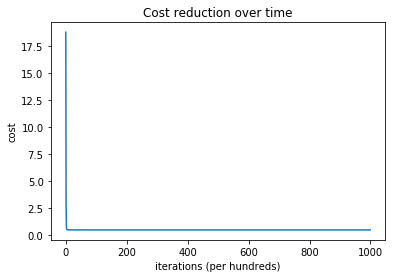

In [568]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()



Linear Regression using sckit-learn



In [575]:
reg = LinearRegression()
reg.fit(X[:, 1:], y)
y_pred = reg.predict(X[:, 1:])

print("coeficients :",reg.coef_)
print("intercept   :",reg.intercept_)
print("MSE         :",MSE(y, y_pred ))
print("r2_score    :",r2_score(y, y_pred ))


coeficients : [0.08564622]
intercept   : 3.9152047420838145
MSE         : 0.5130161734617366
r2_score    : 0.0010782641230113743


theta[0] represent the y-intercept of regression line

theta[1] represent the slope of regression line

# 3.  Splitting the data into train-test sets , Finding MSE on training and testing set

In [93]:
X.shape

(50000, 2)

In [94]:
y.shape

(50000,)

In [95]:
X_train, X_test = X[:int(len(X)/2),1:], X[int(len(X)/2):,1:]

In [96]:
y_train, y_test = y[:int(len(X)/2)], y[int(len(X)/2):]




Multile Regression using scikit-learn

In [97]:
# linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
print("coeficients: ",reg.coef_)
print("intercept: ",reg.intercept_)
print("MSE on train set: ",MSE(y_train, reg.predict(X_train)) )
print("MSE on test set: ",MSE(y_test, reg.predict(X_test)))
print("r2_score on train set:",r2_score(y_train, reg.predict(X_train)) )
print("r2_score on test set:",r2_score(y_test, reg.predict(X_test)) )

coeficients:  [0.05606027]
intercept:  3.9043563922942206
MSE on train set:  0.558107286558669
MSE on test set:  0.46841005096664573
r2_score on train set: 0.0004442931134949202
r2_score on test set: 7.227980262203282e-05


# 4. Extending the above model , incorporating binary features for every style of beer with ≥ 50 reviews

In [585]:
def genFeatures(data, revFreq):
    beer_rev50 = []
    for beer_style in revFreq.keys():
        if revFreq[beer_style] > 50:
            beer_rev50.append(beer_style)

    #print( "beer styles with reviews count > 50 are :",len(beer_rev50))
    X = []
    y = []
    for d in data:
        x = []
        for beer in beer_rev50:
            x.append( d['beer/style'] == beer )
        X.append(x)
        y.append(d['review/taste'])
    return X, y

In [595]:
X, y = genFeatures(data, revFreq)

In [596]:
X = np.array(X)
y = np.array(y)

In [597]:
X.shape, y.shape

((50000, 74), (50000,))

In [598]:
X_train, X_test = X[:int(len(X)/2),:], X[int(len(X)/2):,:]

In [599]:
y_train, y_test = y[:int(len(X)/2)], y[int(len(X)/2):]

Multiple Regression using Gradient Descent



In [600]:
theta, costs = perform_linReg(X_train, y_train, lr=0.01, num_itr=100000)

18.466161174215785
1.5490885894803492
0.9430198663226093
0.7273682913968028
0.6307755984632287
0.5809299166878924
0.5523048541673914
0.5344712248326355
0.5226539191642804
0.5144452282235812


In [601]:
y_pred = predict_linReg(X_train, theta)
print("Theta                 :", theta)
print("MSE on train set      :", mse_linReg(y_train, y_pred))
print("R2_score on train set :", r2_linReg(y_train, y_pred) )
y_pred = predict_linReg(X_test, theta)
print("MSE on test set       :", mse_linReg(y_test, y_pred))
print("R2_score on test set  :", r2_linReg(y_test, y_pred))

Theta                 : [2.16067365 3.70496231 3.71880122 2.71213301 3.63421292 2.33431577
 3.01349467 3.60097688 3.27417137 3.62300486 2.17533747 4.09087111
 4.23561594 2.77352253 3.74666144 3.39813055 0.22558877 3.06494389
 0.98468172 2.68658586 3.57704447 4.30245993 3.41188565 3.87390864
 3.45461356 2.2588773  4.06320225 2.46185677 3.57320825 3.47096659
 3.15159761 3.57563592 3.94278607 4.0922619  3.95347531 2.00077233
 3.36157604 0.33766567 3.96041667 3.28607378 3.50844877 3.264106
 3.14865736 3.87378629 3.49047595 3.38924058 3.75011194 3.1762208
 3.63327154 3.59017125 3.92288    2.71761546 3.80994151 4.44843488
 1.73576346 2.85952762 3.39750714 2.89522068 3.67866154 3.66430649
 3.93741678 3.71970596 3.25472511 1.79456744 3.73249376 2.51111882
 1.54122883 2.54495123 4.07524272 3.720022   3.91330349 3.33223932
 1.6709058  2.37291665]
MSE on train set      : 0.5085291066874872
R2_score on train set : 0.0892375302218158
MSE on test set       : 1.0439487115649964
R2_score on test set  




Multiple Linear Regression Using scikit-learn



In [104]:
# linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("coeficients          : ",reg.coef_)
print("intercept            : ",reg.intercept_)

y_pred = reg.predict(X_train)
print("MSE on train set     : ",MSE(y_train, reg.predict(X_train)) )
print("r2_score on train set:",r2_score(y_train, y_pred) )

y_pred = reg.predict(X_test)
print("MSE on test set      : ",MSE(y_test, reg.predict(X_test)) )
print("r2_score on test set :",r2_score(y_test, y_pred) )

coeficients:  [ 0.71136364  0.09815076  0.12193999 -0.4664673   0.02739474  0.12395105
  0.22651515 -0.0058248  -0.2937747   0.01699134 -0.50681818  0.58195733
  0.76540404 -0.83277972  0.14466111  0.11433566  0.39318182  0.26818182
  0.25681818 -0.92019846 -0.02450111  0.69564175 -0.1798951   0.26709486
 -0.10223103  0.01818182  0.45638407 -0.58598485  0.10049889 -0.13106061
 -0.45410882  0.38356643  0.33596789  0.48544372  0.3763751  -0.65227273
  0.44318182 -0.35681818  0.35359848  0.60472028 -0.09003966 -0.22045455
 -0.17824675  0.26761104 -0.11634199  0.1527972   0.16385851 -0.41285266
  0.03420746  0.19621212  0.33580477 -0.74318182  0.20312334  0.8416167
 -0.10681818 -0.73802386 -0.18884943 -0.63806818  0.13786267  0.05895722
  0.3305986   0.12651515 -0.31931818 -1.00681818  0.20984848  0.65508658
 -0.20681818 -0.38622995  0.46842454  0.11320382  0.3449362  -0.27061129
 -0.62765152 -1.23390152]
intercept:  3.606818181818188
MSE on training set:  0.3678402770901444
MSE on testing

# Tasks — Classification (week 2):

# 5. A predictor that estimates whether a beer is an `American IPA` using two features:
[`beer/ABV`,`review/taste`]

In [105]:
def feature_ABV_taste(datum):
    return [1, datum['beer/ABV'], datum['review/taste']]

In [106]:
X = [feature_ABV_taste(d) for d in data]
y = [d['beer/style'] == 'American IPA' for d in data]

In [107]:
len(X), len(y)

(50000, 50000)

In [108]:
X_train, X_test = X[:int(len(X)/2)], X[int(len(X)/2):]

In [109]:
y_train, y_test = y[:int(len(y)/2)], y[int(len(y)/2):]

Using scikit-learn

In [110]:
clf = svm.SVC(C=1000)
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [111]:
y_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred )
print("Train set accuracy score : ", train_acc )
print("confusion matrix :\n", confusion_matrix(y_train, y_pred))
print("classification report :\n",classification_report(y_train, y_pred))

Train set accuracy score :  0.9226
confusion matrix :
 [[22594   246]
 [ 1689   471]]
classification report :
              precision    recall  f1-score   support

      False       0.93      0.99      0.96     22840
       True       0.66      0.22      0.33      2160

avg / total       0.91      0.92      0.90     25000



In [112]:
y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test set accuracy score :", test_acc )
print("confusion matrix : \n",confusion_matrix(y_test, y_pred))
print("classification report :\n",classification_report(y_test, y_pred))

Test set accuracy score : 0.85632
confusion matrix : 
 [[21364  1683]
 [ 1909    44]]
classification report :
              precision    recall  f1-score   support

      False       0.92      0.93      0.92     23047
       True       0.03      0.02      0.02      1953

avg / total       0.85      0.86      0.85     25000



# 6. Feature Engineering using common words in `review/text` of   `American IPA`

In [113]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [114]:
textRevAmericanIPA = []
for d in data:
    if d['beer/style'] == 'American IPA':
        textRevAmericanIPA.append(d['review/text'])


In [115]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = []
for text in textRevAmericanIPA:
    tokens += tokenizer.tokenize(text)
    

In [116]:
stop_words = set(stopwords.words('english'))
all_words = [w for w in tokens if not w in stop_words and len(w) > 2]

In [117]:
freqDist = nltk.FreqDist(all_words)

In [118]:
freqDist.most_common(50)

[('hops', 4686),
 ('head', 3942),
 ('The', 3872),
 ('beer', 3804),
 ('IPA', 3663),
 ('hop', 3343),
 ('malt', 3117),
 ('nice', 2959),
 ('citrus', 2865),
 ('good', 2613),
 ('one', 2040),
 ('orange', 1916),
 ('like', 1916),
 ('white', 1876),
 ('carbonation', 1825),
 ('color', 1799),
 ('glass', 1799),
 ('taste', 1772),
 ('This', 1760),
 ('grapefruit', 1754),
 ('well', 1745),
 ('bitterness', 1734),
 ('pine', 1700),
 ('bitter', 1695),
 ('bit', 1690),
 ('flavor', 1684),
 ('lacing', 1660),
 ('light', 1660),
 ('finish', 1543),
 ('aroma', 1541),
 ('sweet', 1508),
 ('little', 1448),
 ('amber', 1339),
 ('caramel', 1319),
 ('body', 1292),
 ('Very', 1235),
 ('medium', 1179),
 ('bottle', 1151),
 ('Pours', 1141),
 ('floral', 1132),
 ('hoppy', 1102),
 ('great', 1048),
 ('nose', 1044),
 ('really', 1036),
 ('balanced', 1029),
 ('notes', 1014),
 ('smell', 951),
 ('dry', 926),
 ('fresh', 915),
 ('would', 909)]

feat = ['citrus', 'IPA', 'bitter', 'grapefruit','caramel']


In [119]:
def customFeatures(datum):
    return [1, 
            datum['beer/ABV'],
           'citrus' in datum['review/text'],
           'IPA' in datum['review/text'],
           'bitter' in datum['review/text'],
           'grapefruit' in datum['review/text'],
           'caramel' in datum['review/text']]

In [120]:
X = [customFeatures(d) for d in data]
y = [d['beer/style'] == 'American IPA' for d in data]

In [121]:
X_train, X_test = X[:int(len(X)/2)], X[int(len(X)/2):]

In [122]:
y_train, y_test = y[:int(len(X)/2)], y[int(len(X)/2):]

In [123]:
clf2 = svm.SVC(C=1000)
clf2.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
y_pred = clf2.predict(X_train)
train_acc = accuracy_score(y_train, y_pred )

print("Train set accuracy score : ", train_acc )
print("confusion matrix :\n", confusion_matrix(y_train, y_pred))
print("classification report :\n",classification_report(y_train, y_pred))

Train set accuracy score :  0.96248
confusion matrix :
 [[22353   487]
 [  451  1709]]
classification report :
              precision    recall  f1-score   support

      False       0.98      0.98      0.98     22840
       True       0.78      0.79      0.78      2160

avg / total       0.96      0.96      0.96     25000



In [125]:
y_pred = clf2.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Test set accuracy score :", test_acc )
print("confusion matrix : \n",confusion_matrix(y_test, y_pred))
print("classification report :\n",classification_report(y_test, y_pred))

Test set accuracy score : 0.9262
confusion matrix : 
 [[21729  1318]
 [  527  1426]]
classification report :
              precision    recall  f1-score   support

      False       0.98      0.94      0.96     23047
       True       0.52      0.73      0.61      1953

avg / total       0.94      0.93      0.93     25000



# 7. Effect  of  regularization  constant C  on SVM  performance 
  C
∈ [0.1,10,1000,100000]

In [126]:
for c in [0.1, 10, 1000, 100000 ]:
    clf3 = svm.SVC(C=c)
    clf3.fit(X_train, y_train)
    
    y_pred = clf3.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    
    y_pred = clf3.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    print("C : ", c,'\t', "train set accuracy : ", train_acc,"\ttest set accuracy : ", test_acc,"\n")
    

C :  0.1 	 train set accuracy :  0.95192 	test set accuracy :  0.9448 

C :  10 	 train set accuracy :  0.96176 	test set accuracy :  0.93616 

C :  1000 	 train set accuracy :  0.96248 	test set accuracy :  0.9262 

C :  100000 	 train set accuracy :  0.9644 	test set accuracy :  0.92496 



# 8.Logistic Regression

In [602]:
X = [feature_ABV_taste(d) for d in data]
y = [d['beer/style'] == 'American IPA' for d in data]

In [603]:
X = np.array(X)
y = np.array(y)

In [604]:
X_train, X_test = X[:int(len(X)/2)], X[int(len(X)/2):]

In [605]:
y_train, y_test = y[:int(len(X)/2)], y[int(len(X)/2):]

Logistic Regression using Gradient Descent

In [606]:
def init_theta(X):
    n_coeff = X.shape[1]
    return np.random.randn(n_coeff)

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def hypo_logReg(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

def costFun_logReg(X, y, theta):
    m = X.shape[0]
    h = hypo_logReg(X, theta)
    
    return (-1/m)*( np.sum( y * np.log(h) + (1 - y) * np.log (1 - h) ) )

def cal_gradient_logReg(X, y, theta):
    h = hypo_logReg(X, theta)
    return np.dot( X.T, (h - y) ) / len(y)

def perform_logReg(X, y, lr=0.01, num_itr=100000):
    theta = init_theta(X)
    costs = []
    for i in range(num_itr):
        gradient = cal_gradient_logReg(X, y, theta)
        theta -= lr * gradient
        if( i % 100 == 0):
            costs.append(costFun_logReg(X, y, theta))
    return theta, costs

def predict_logReg(X, theta):
    h = hypo_logReg(X, theta)
    y_pred = (h >= 0.5).astype(np.int)
    return y_pred

def accuracy_logReg(y_true, y_pred):
    correct_pred =[ true == pred for true, pred in zip(y_true, y_pred)] 
    accuracy =  np.sum(correct_pred) * 1.0 / len(correct_pred)
    return accuracy

def classificationReport(y_true, y_pred):
    pass

In [ ]:
theta, costs = perform_logReg(X_train, y_train, lr=0.01, num_itr=100000)

In [ ]:
print("theta             : {}".format(theta) )

y_pred = predict_logReg(X_train, theta)
print("train set accuracy: ", accuracy_logReg(y_train, y_pred) )

y_pred = predict_logReg(X_test, theta)
print("test set accuracy : ", accuracy_logReg(y_test, y_pred) )

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

Logistic Regression using scikit-learn

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

In [ ]:
print("theta              : ", clf.intercept_, clf.coef_)

y_pred = clf.predict(X_train)
print("train set accuracy :", accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print("test set accuracy  : ", accuracy_score(y_test, y_pred))